# Don't get kicked

In [1]:
import os
os.chdir("C:/interviews/QVentus")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [3]:
# for feature selecto=ion
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel

In [4]:
df = pd.read_csv("training.csv")
df.head()

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [5]:
df.shape

(72983, 34)

In [6]:
count_nans = df.shape[0] - df.dropna().shape[0]
print ("%d rows have missing values in the train data" %count_nans)
df.isnull().sum()

69707 rows have missing values in the train data


RefId                                    0
IsBadBuy                                 0
PurchDate                                0
Auction                                  0
VehYear                                  0
VehicleAge                               0
Make                                     0
Model                                    0
Trim                                  2360
SubModel                                 8
Color                                    8
Transmission                             9
WheelTypeID                           3169
WheelType                             3174
VehOdo                                   0
Nationality                              5
Size                                     5
TopThreeAmericanName                     5
MMRAcquisitionAuctionAveragePrice       18
MMRAcquisitionAuctionCleanPrice         18
MMRAcquisitionRetailAveragePrice        18
MMRAcquisitonRetailCleanPrice           18
MMRCurrentAuctionAveragePrice          315
MMRCurrentA

In [7]:
# We remove PRIMEUNIT & AUCGUART columns due to high ratio (0.922283) of missing/total for PRIMEUNIT & AUCGUART 
df['PRIMEUNIT'].isnull().sum()/df.shape[0]
df.drop(['PRIMEUNIT','AUCGUART','RefId','PurchDate'], axis=1,inplace=True)
df.shape

(72983, 30)

# Impute missing value with the most frequence value
This is used for category only, but apply for ordinal values for simplicity

In [8]:
df=df.apply(lambda x:x.fillna(x.value_counts().index[0]))
df.isnull().sum()

IsBadBuy                             0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelTypeID                          0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNZIP1                   

In [8]:
names=np.array(df.columns.values)
cat = [names[i] for i in [1,4,5,6,7,8,9,11,13,14,15,26]]

# Transform category feature in into numeric feature
le = LabelEncoder()
def toNumeric(df,cat): 
    for feature in cat:
        le.fit(df[ feature])
        df[feature] = le.transform(df[feature])
    return df    
df= toNumeric(df,cat)

In [9]:
# Load test cases and repeat the same process
df_test = pd.read_csv("test.csv")
count_nans = df.shape[0] - df.dropna().shape[0]
print ("%d rows have missing values in the test data" %count_nans)
df_test.drop(['PRIMEUNIT','AUCGUART','PurchDate'], axis=1,inplace=True)
# Impute missing values 
df_test=df_test.apply(lambda x:x.fillna(x.value_counts().index[0]))
df_test.isnull().sum()

0 rows have missing values in the test data


RefId                                0
Auction                              0
VehYear                              0
VehicleAge                           0
Make                                 0
Model                                0
Trim                                 0
SubModel                             0
Color                                0
Transmission                         0
WheelTypeID                          0
WheelType                            0
VehOdo                               0
Nationality                          0
Size                                 0
TopThreeAmericanName                 0
MMRAcquisitionAuctionAveragePrice    0
MMRAcquisitionAuctionCleanPrice      0
MMRAcquisitionRetailAveragePrice     0
MMRAcquisitonRetailCleanPrice        0
MMRCurrentAuctionAveragePrice        0
MMRCurrentAuctionCleanPrice          0
MMRCurrentRetailAveragePrice         0
MMRCurrentRetailCleanPrice           0
BYRNO                                0
VNZIP1                   

In [10]:
# Convert to numeric 
names=np.array(df_test.columns.values)
cat = [names[i] for i in [1,4,5 ,6,7,8,9,11,13,14,15,26]]
df_test= toNumeric(df_test,cat)


In [11]:
# Without parameter search
X_train,X_test, y_train,y_test = train_test_split(df[df.columns.difference(['IsBadBuy'])],df['IsBadBuy'], test_size=0.3,random_state=42)
rf = RandomForestClassifier(max_depth=3, n_estimators=20)
acc_rf = cross_val_score(rf,X_train,y_train,cv=10,scoring='accuracy',n_jobs=-1)
print(acc_rf.mean())
rf.fit(X_train,y_train)
predict = rf.predict(X_test)

0.874608532035


In [12]:
# With parameter search
rf_params = {
    'criterion': ['gini'], 'max_features':[5,10],
    'min_samples_split': [2, 10],'min_samples_leaf':[3,10],
    'max_depth': [3, 5],'bootstrap':[True,False]
}

gs_rf = GridSearchCV(rf,rf_params,cv=10,scoring='accuracy',n_jobs=-1)
gs_rf.fit(X_train,y_train)

print(gs_rf.best_params_)
print(gs_rf.best_score_)

{'min_samples_split': 10, 'max_depth': 5, 'max_features': 5, 'bootstrap': True, 'min_samples_leaf': 3, 'criterion': 'gini'}
0.874823833386


In [13]:
# save the results based on accuracy to a pandas dataframe with an "id" column and
predict = gs_rf.predict(df_test[df_test.columns.difference(['RefId'])])
output = pd.DataFrame( data={"RefId":df_test["RefId"], "IsBadBuy":predict} )
output.to_csv( "RandomForestModel.csv", index=False, quoting=3 )

# Using Support Vector Machine

In [14]:
df = pd.read_csv("training.csv")
df['PRIMEUNIT'].isnull().sum()/df.shape[0]
df.drop(['PRIMEUNIT','AUCGUART','RefId','PurchDate'], axis=1,inplace=True)
df.isnull().sum()

IsBadBuy                                0
Auction                                 0
VehYear                                 0
VehicleAge                              0
Make                                    0
Model                                   0
Trim                                 2360
SubModel                                8
Color                                   8
Transmission                            9
WheelTypeID                          3169
WheelType                            3174
VehOdo                                  0
Nationality                             5
Size                                    5
TopThreeAmericanName                    5
MMRAcquisitionAuctionAveragePrice      18
MMRAcquisitionAuctionCleanPrice        18
MMRAcquisitionRetailAveragePrice       18
MMRAcquisitonRetailCleanPrice          18
MMRCurrentAuctionAveragePrice         315
MMRCurrentAuctionCleanPrice           315
MMRCurrentRetailAveragePrice          315
MMRCurrentRetailCleanPrice        

In [15]:
# Impute missing values 
df=df.apply(lambda x:x.fillna(x.value_counts().index[0]))
# Convert categories to numeric values
names=np.array(df.columns.values)
cat = [names[i] for i in [1,4,5,6,7,8,9,11,13,14,15,26]]
le = LabelEncoder()
def toNumeric(df,cat): 
    for feature in cat:
        le.fit(df[ feature])
        df[feature] = le.transform(df[feature])
    return df    
df= toNumeric(df,cat)

In [16]:
X_train,X_test, y_train,y_test = train_test_split(df[df.columns.difference(['IsBadBuy'])],df['IsBadBuy'], test_size=0.3, random_state=42)

In [83]:
steps = [('scaler', StandardScaler()), ('SVM', SVC())]
pipeline = Pipeline(steps)
parameters = {'SVM__C':[1, 10, 100], 'SVM__gamma':[0.1, 0.01]}
cv = GridSearchCV(pipeline, parameters,cv=3)
cv.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Pipeline(steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('SVM', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'SVM__gamma': [0.1, 0.01], 'SVM__C': [1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [84]:
print("Accuracy: {}".format(cv.score(X_test, y_test)))

Accuracy: 0.8762731217172871


# Voting classifiers

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

lr_clf = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
sv_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', lr_clf), ('rf', rf_clf), ('svc', sv_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         n_jobs=1, voting='hard', weights=None)

In [87]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.875953414021
RandomForestClassifier 0.871431833752
SVC 0.875953414021
VotingClassifier 0.875953414021


In [104]:
print(sorted(zip(map(lambda x: round(x, 3), rnd_clf.feature_importances_), names), reverse=True))

[(0.070000000000000007, 'MMRCurrentRetailCleanPrice'), (0.068000000000000005, 'MMRCurrentRetailAveragePrice'), (0.058999999999999997, 'Make'), (0.057000000000000002, 'Transmission'), (0.056000000000000001, 'SubModel'), (0.055, 'WheelType'), (0.055, 'Model'), (0.053999999999999999, 'WheelTypeID'), (0.052999999999999999, 'Color'), (0.051999999999999998, 'Trim'), (0.049000000000000002, 'MMRCurrentAuctionCleanPrice'), (0.042999999999999997, 'Auction'), (0.042000000000000003, 'VNST'), (0.037999999999999999, 'Nationality'), (0.035999999999999997, 'VehYear'), (0.033000000000000002, 'MMRAcquisitionAuctionAveragePrice'), (0.032000000000000001, 'MMRCurrentAuctionAveragePrice'), (0.028000000000000001, 'MMRAcquisitonRetailCleanPrice'), (0.021999999999999999, 'VNZIP1'), (0.021000000000000001, 'VehOdo'), (0.016, 'IsBadBuy'), (0.016, 'BYRNO'), (0.014, 'TopThreeAmericanName'), (0.01, 'MMRAcquisitionAuctionCleanPrice'), (0.0080000000000000002, 'VehBCost'), (0.0070000000000000001, 'IsOnlineSale'), (0.00

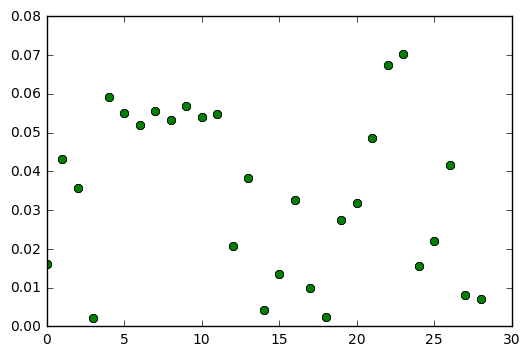

In [105]:
rnd_clf.fit(X_train,y_train)
plt.plot(rnd_clf.feature_importances_,'o')
#plt.xticks(X_train.shape[1],X_train.columns.values,rotation=90)
plt.show()

# Gradient Boosting

In [106]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X_train,y_train)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=3, presort='auto',
             random_state=42, subsample=1.0, verbose=0, warm_start=False)

In [108]:
pred= gbrt.predict(X_test)
pred

array([ 0.12551317,  0.13669615,  0.060445  , ...,  0.04926202,
        0.10882164,  0.060445  ])

# Using feature Selection

In [54]:
df = pd.read_csv("training.csv")
df['PRIMEUNIT'].isnull().sum()/df.shape[0]
df.drop(['PRIMEUNIT','AUCGUART','RefId','PurchDate'], axis=1,inplace=True)

In [55]:
# Feature selection
from sklearn.feature_selection import SelectFromModel
df=df.apply(lambda x:x.fillna(x.value_counts().index[0]))
def toNumeric(df,cat): 
    for feature in cat:
        le.fit(df[ feature])
        df[feature] = le.transform(df[feature])
    return df 

In [56]:
# select numeric columns only
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include=numerics)
num_feat= list(num_df.columns.values)
# get category only
cat_df=df[df.columns.difference(num_feat)]
cat_feat= list(cat_df.columns.values)


In [57]:
cat_df.columns.values

array(['Auction', 'Color', 'Make', 'Model', 'Nationality', 'Size',
       'SubModel', 'TopThreeAmericanName', 'Transmission', 'Trim', 'VNST',
       'WheelType'], dtype=object)

In [58]:
# Transform category feature in into numeric feature
le = LabelEncoder()
def toNumeric(df,cat): 
    for feature in cat:
        le.fit(df[ feature])
        df[feature] = le.transform(df[feature])
    return df    
y = df.pop('IsBadBuy')  # store y =label
df= toNumeric(df,cat_df)

In [59]:
df.head()

,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,Color,Transmission,WheelTypeID,...,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,2006,3,17,586,132,221,12,0,1.0,...,7451.0,8552.0,11597.0,12409.0,21973,33619,5,7100.0,0,1113
1,0,2004,5,5,0,93,765,14,0,1.0,...,7456.0,9222.0,11374.0,12791.0,19638,33619,5,7600.0,0,1053
2,0,2005,4,5,883,98,292,7,0,2.0,...,4035.0,5557.0,7146.0,8702.0,19638,33619,5,4900.0,0,1389
3,0,2004,5,5,662,98,152,13,0,1.0,...,1844.0,2646.0,4375.0,5518.0,19638,33619,5,4100.0,0,630
4,0,2005,4,6,368,126,52,13,1,2.0,...,3247.0,4384.0,6739.0,7911.0,19638,33619,5,4000.0,0,1020


In [64]:
model= RandomForestClassifier(n_estimators=100,random_state=10)
X_train,X_test,y_train,y_test = train_test_split(df,y,random_state=10)
select = SelectFromModel(model,threshold=0.01)
select.fit(X_train,y_train)
X_train_selected = select.transform(X_train)

In [72]:
features=df.columns.values
# Store selected Features
selectedFeatures= features[select.get_support()]

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True], dtype=bool)

In [78]:
# Store selected Features
selectedFeatures= features[select.get_support()]

(24,)

In [80]:
rf = RandomForestClassifier(max_depth=3, n_estimators=20)
rf_params = {
    'criterion': ['gini'], 'max_features':[5,10],
    'min_samples_split': [2, 10],'min_samples_leaf':[3,10],
    'max_depth': [3, 5],'bootstrap':[True,False]
}

gs_rf = GridSearchCV(rf,rf_params,cv=10,scoring='accuracy',n_jobs=-1)
gs_rf.fit(X_train_selected,y_train)
print(gs_rf.best_params_)
print(gs_rf.best_score_)

{'criterion': 'gini', 'bootstrap': False, 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 3, 'max_features': 10}
0.877578237755


# Spliting numeric / category to impute missing values and combine back 

In [72]:
# select numeric columns only
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_df = df.select_dtypes(include=numerics)
y = num_df.pop('IsBadBuy')  # store y =label
num_feat= list(num_df.columns.values)
num_feat

['VehYear',
 'VehicleAge',
 'WheelTypeID',
 'VehOdo',
 'MMRAcquisitionAuctionAveragePrice',
 'MMRAcquisitionAuctionCleanPrice',
 'MMRAcquisitionRetailAveragePrice',
 'MMRAcquisitonRetailCleanPrice',
 'MMRCurrentAuctionAveragePrice',
 'MMRCurrentAuctionCleanPrice',
 'MMRCurrentRetailAveragePrice',
 'MMRCurrentRetailCleanPrice',
 'BYRNO',
 'VNZIP1',
 'VehBCost',
 'IsOnlineSale',
 'WarrantyCost']

In [74]:
# get category only
cat_df=df[df.columns.difference(num_feat)]
cat_feat= list(cat_df.columns.values)


In [76]:
# Impute missing data to generate numpy array
imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
num_np = imp.fit_transform(num_df)

In [81]:
cat_df=cat_df.apply(lambda x:x.fillna(x.value_counts().index[0]))
le = LabelEncoder()
def toNumeric(df,cat_feat): 
    for feature in cat_feat:
        le.fit(df[ feature])
        df[feature] = le.transform(df[feature])
    return df    
cat_df= toNumeric(cat_df,cat_feat)
cat_np = cat_df.values

In [ ]:
rf = RandomForestClassifier(max_depth=3, n_estimators=20)
acc_rf = cross_val_score(rf,processed_df,y,cv=10,scoring='accuracy',n_jobs=-1)
print(acc_rf.mean())

In [91]:
np.isnan(sum(processed_df))

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False], dtype=bool)

In [87]:
# concatenate category and numeric back 
processed_df= np.concatenate([cat_df,num_df],axis=1)
processed_df.shape

(72983, 30)

In [ ]:
cross_val_score(processed_df,y) scores = cross_val_score(rf, X, y, cv=3, scoring='roc_auc')

In [32]:
steps = [('imputation', Imputer(missing_values='NaN', strategy='most_frequent', axis=0)),
        ('LogisticRegression', LogisticRegression())]

pipeline = Pipeline(steps)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Fit the pipeline to the train set
#____
pipeline.fit(X_train,y_train)

# Predict the labels of the test set
#y_pred = ____
y_pred = pipeline.predict(X_test)

NameError: name 'X' is not defined

In [ ]:
# Import FunctionTransformer
from sklearn.preprocessing import FunctionTransformer
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[['numeric', 'with_missing']], validate=False)
just_text_data = get_text_data.fit_transform(sample_df)
just_numeric_data = get_numeric_data.fit_transform(sample_df)

# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

In [94]:
from sklearn.datasets import make_blobs, make_circles
X,y =make_circles(noise=0.25,factor=0.5,random_state=1)

In [95]:
y_named =np.array(["blue","red"])[y]

In [96]:
y_named

array(['red', 'red', 'blue', 'red', 'red', 'blue', 'blue', 'red', 'red',
       'red', 'red', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'blue',
       'red', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'blue', 'red',
       'blue', 'blue', 'blue', 'red', 'red', 'red', 'red', 'red', 'blue',
       'blue', 'red', 'blue', 'blue', 'red', 'red', 'red', 'blue', 'red',
       'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'blue', 'blue',
       'red', 'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'red',
       'blue', 'blue', 'red', 'blue', 'red', 'blue', 'red', 'red', 'blue',
       'red', 'red', 'blue', 'red', 'blue', 'red', 'red', 'blue', 'blue',
       'blue', 'blue', 'blue', 'blue', 'red', 'blue', 'blue', 'red', 'red',
       'blue', 'blue', 'red', 'red', 'blue', 'red', 'blue', 'red', 'blue',
       'blue'], 
      dtype='<U4')

In [97]:
y

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)